# Analiza danych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from scipy.stats import multivariate_normal

##Rozk≈Çad wielomianowy
Zmienna losowa $(X_1, X_2, \ldots, X_k)$ ma rozk≈Çad wielomianowy, je≈ºeli
\begin{equation*}
    P(X_1=n_1, \ldots, X_k=n_k)=\frac{n!}{n_1!\cdot\ldots\cdot n_k!}p_1^{n_1}\cdot\ldots\cdot p_k^{n_k},
\end{equation*}
gdzie $p_i\in(0,1)$, $i=1,2,\ldots, k$, $p_1+p_2+\ldots+p_k=1$, $n_1+n_2+\ldots+n_k=n$.

Rozk≈Çad wielomianowy jest uog√≥lnieniem rozk≈Çadu dwumianowego i opisuje rozk≈Çad wynik√≥w przy $n$-krotnym powt√≥rzeniu do≈õwiadczenia o $k$ mo≈ºliwych rezultatach.

$X_i$ oznacza liczbƒô wynik√≥w $i$-tego typu w serii.

Rozk≈Çad wielomianowy mo≈ºna wykorzystaƒá do obliczenia prawdopodobie≈Ñstwa w sytuacjach, w kt√≥rych istniejƒÖ wiƒôcej ni≈º dwa mo≈ºliwe wyniki.

## Zadanie 1 - Rozk≈Çad wielomianowy

1. Zdefiniuj zmiennƒÖ losowƒÖ dla rozk≈Çadu wielomianowego (`stats.multinomial`).
2. Wygeneruj $n$ punkt√≥w z zaproponowanego rozk≈Çadu wielomianowego, narysuj histogramy.
2. Oblicz: w pewnym mie≈õcie 40% uprawnionych do g≈Çosowania popiera kandydata A, 10% popiera kandydata B, a pozosta≈Çe 50% nie ma preferencji. Wybieramy losowo 10 uprawnionych do g≈Çosowania. Jakie jest prawdopodobie≈Ñstwo, ≈ºe 4 z nich popiera kandydata A, 1 popiera kandydata B, a pozosta≈Çe 5 nie bƒôdzie mia≈Ço preferencji?

      A  B  C
0     6  0  4
1     3  1  6
2     7  0  3
3     5  1  4
4     6  0  4
...  .. .. ..
9995  3  1  6
9996  5  1  4
9997  6  1  3
9998  5  0  5
9999  6  1  3

[10000 rows x 3 columns]


0.10080000000000021

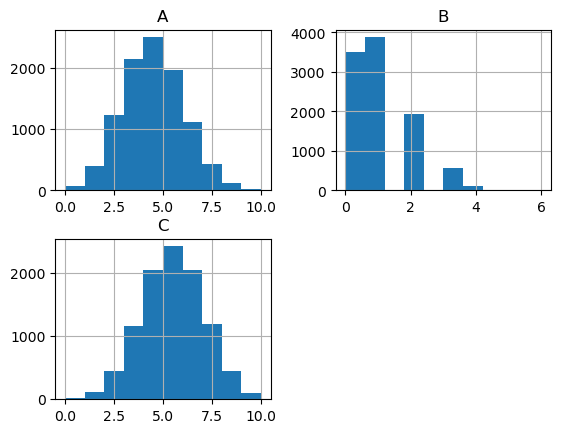

In [10]:
#1 i 2
multi10 = stats.multinomial(10, [0.4, 0.1, 0.5])
x = pd.DataFrame(multi10.rvs(10000),columns=['A','B','C'])
print(x)
x.hist(bins=10)
#3
multi10.pmf([4,1,5]) # pmf - probability mass function
# wychodzi p = 0.1 ze tak bedzie 
# 

#Rozk≈Çad dwuwymiarowy normalny
Zmienna losowa $(X, Y)$ ma rozk≈Çad dwuwymiarowy normalny z parametrami $\mu_X$, $\mu_Y$, $\sigma_X>0$, $\sigma_Y>0$ oraz $\rho\in(-1,1)$, je≈ºeli jej gƒôsto≈õƒá $f$ wyra≈ºa siƒô wzorem
\begin{equation*}
    f(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y\sqrt{1-\rho^2}} \exp\Bigg\{-\frac{1}{2(1-\rho^2)}\Bigg[\frac{(x-\mu_X)^2}{\sigma^2_X} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} \Bigg] \Bigg\}.
\end{equation*}

\pause
\textit{Je≈ºeli dwuwymiarowa zmienna losowa $(X, Y)$ ma rozk≈Çad normalny, to zmienne losowe $X$ i $Y$ majƒÖ, odpowiednio, jednowymiarowe rozk≈Çady normalne $\mathcal{N}(\mu_X, \sigma_X)$~i~$\mathcal{N}(\mu_Y, \sigma_Y)$.}

## Zadanie 2 - Dwuwymiarowy rozk≈Çad normalny
1. Zdefiniuj zmiennƒÖ losowƒÖ dla rozk≈Çadu normalnego 2-wymiarowego (`multivariate_normal`, `np.meshgrid`).
2. Narysuj gƒôsto≈õƒá (`multivariate_normal.pdf`) oraz wykres konturowy gƒôsto≈õci (`plot_surface` i `contourf`).
3. Wylosuj $n$ obserwacji ze zdefiniowanego rozk≈Çadu i narysuj wykres rozproszenia dla wylosowanej pr√≥bki.
4. Por√≥wnaj wykresy gƒôsto≈õci dla r√≥≈ºnych warto≈õci wektora ≈õredniej i macierzy kowariancji.

In [11]:
mu = [0,0] # srednia x, srednia y w liscie
s=[[1,0],[0,1]] # to jest wariancja x i wariancja y (oba 1), to jest ro dla x  i dla y (tutaj 0) 
# musza dla x i y byc rowne zeby zadzialalo

mnormal = multivariate_normal(mean = mu,cov = s)

In [12]:
XY = mnormal.rvs(size=1000)
XY

array([[-0.43533381, -1.49756134],
       [ 1.60154161,  0.69769345],
       [ 2.44129021, -0.37239908],
       ...,
       [-0.5089148 ,  1.22319735],
       [ 0.20237472, -0.84835809],
       [-0.3974247 ,  0.77643696]])

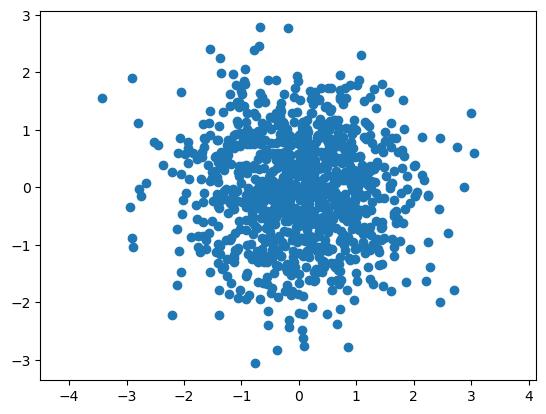

In [13]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()

In [14]:
#techniczne przer√≥bki, aby narysowaƒá gƒôsto≈õƒá 3D
N = 100
X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)
print(X)
print(Y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

In [15]:
Z = mnormal.pdf(pos)

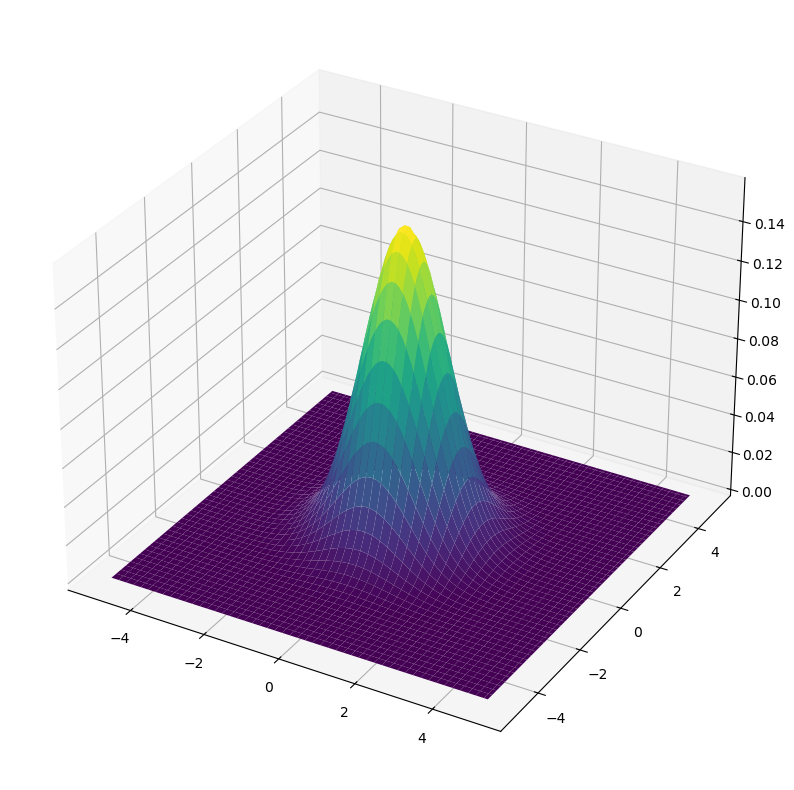

In [16]:
#gƒôsto≈õƒá
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

C:\Users\BPE\AppData\Local\Temp\ipykernel_16144\2401250303.py:3: UserWarning: The following kwargs were not used by contour: 'origincmap'
  ax.contourf(X,Y,Z,origincmap = cm.viridis);


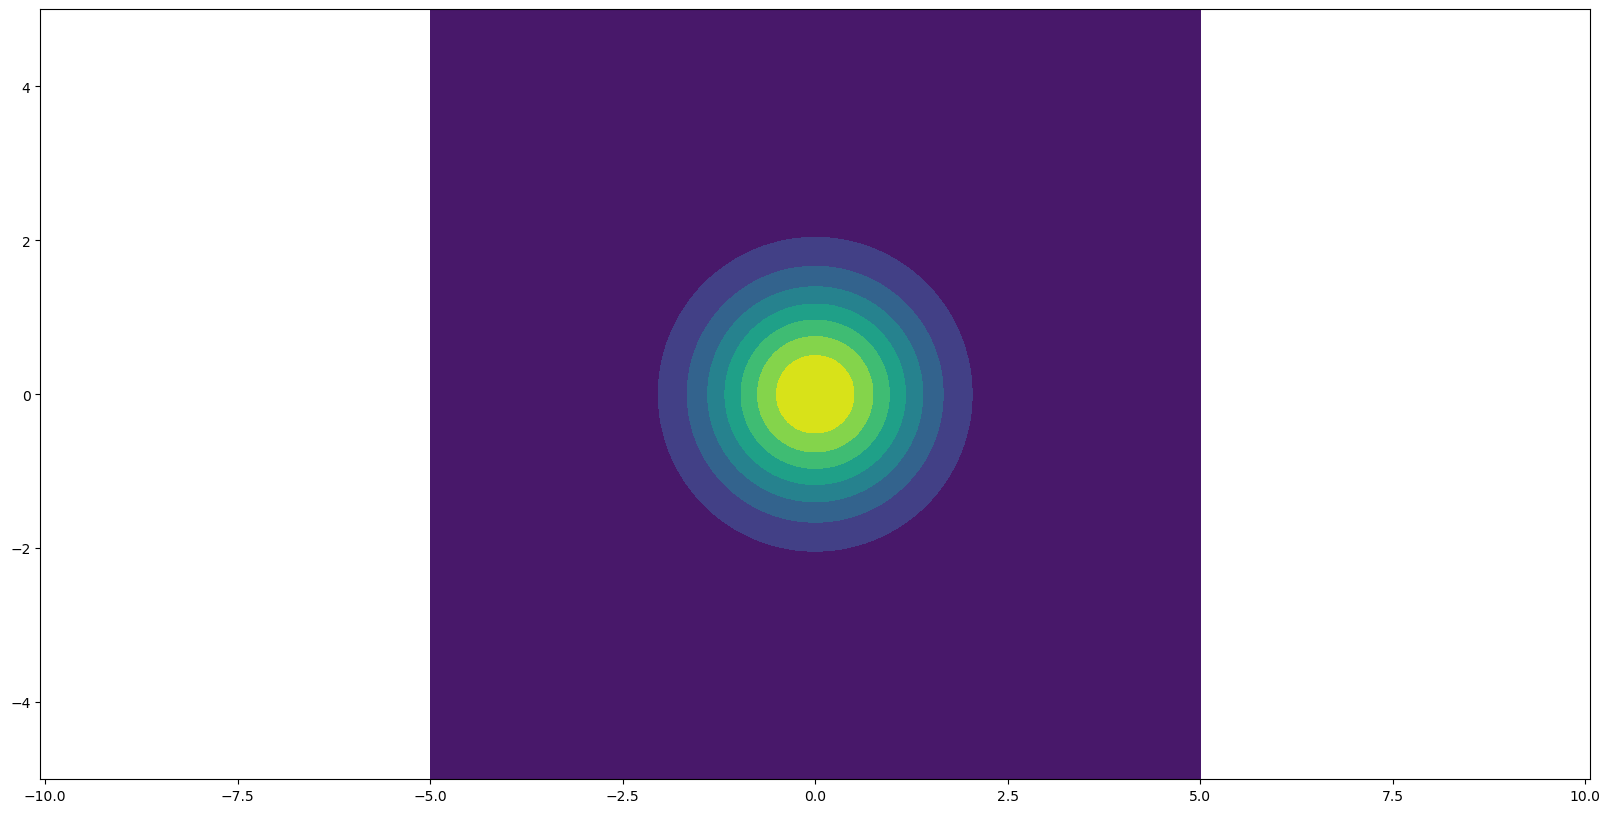

In [20]:
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,origincmap = cm.viridis);
# widok z gory

In [21]:
mu = [0,0]
s=[[1,0.8],[0.8,1]]

mnormal = multivariate_normal(mean = mu,cov = s)

In [27]:
XY = mnormal.rvs(size=1000)
XY

array([[ 0.20267122,  0.40018126],
       [-0.16670802, -0.01515865],
       [ 0.01153158,  0.08204324],
       ...,
       [-0.50256866, -0.3715681 ],
       [ 0.29374736,  0.89060866],
       [-0.75504314, -1.11628031]])

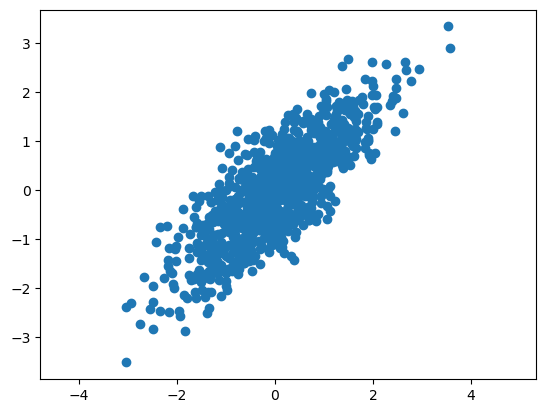

In [28]:
plt.scatter(XY[:,0],XY[:,1])
plt.axis('equal')
plt.show()

In [29]:
# sprawdzic potem~!
N = 100
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
pos

array([[[-5.       , -5.       ],
        [-4.8989899, -5.       ],
        [-4.7979798, -5.       ],
        ...,
        [ 4.7979798, -5.       ],
        [ 4.8989899, -5.       ],
        [ 5.       , -5.       ]],

       [[-5.       , -4.8989899],
        [-4.8989899, -4.8989899],
        [-4.7979798, -4.8989899],
        ...,
        [ 4.7979798, -4.8989899],
        [ 4.8989899, -4.8989899],
        [ 5.       , -4.8989899]],

       [[-5.       , -4.7979798],
        [-4.8989899, -4.7979798],
        [-4.7979798, -4.7979798],
        ...,
        [ 4.7979798, -4.7979798],
        [ 4.8989899, -4.7979798],
        [ 5.       , -4.7979798]],

       ...,

       [[-5.       ,  4.7979798],
        [-4.8989899,  4.7979798],
        [-4.7979798,  4.7979798],
        ...,
        [ 4.7979798,  4.7979798],
        [ 4.8989899,  4.7979798],
        [ 5.       ,  4.7979798]],

       [[-5.       ,  4.8989899],
        [-4.8989899,  4.8989899],
        [-4.7979798,  4.8989899],
        .

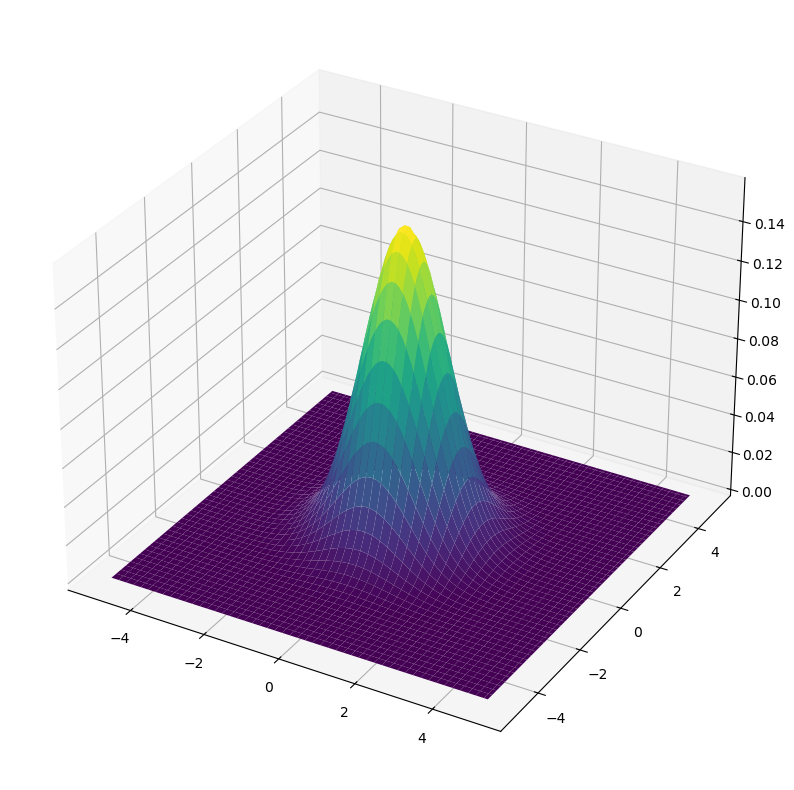

In [30]:
#gƒôsto≈õƒá
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,linewidth = 1,cmap = cm.viridis)

C:\Users\BPE\AppData\Local\Temp\ipykernel_16144\2401250303.py:3: UserWarning: The following kwargs were not used by contour: 'origincmap'
  ax.contourf(X,Y,Z,origincmap = cm.viridis);


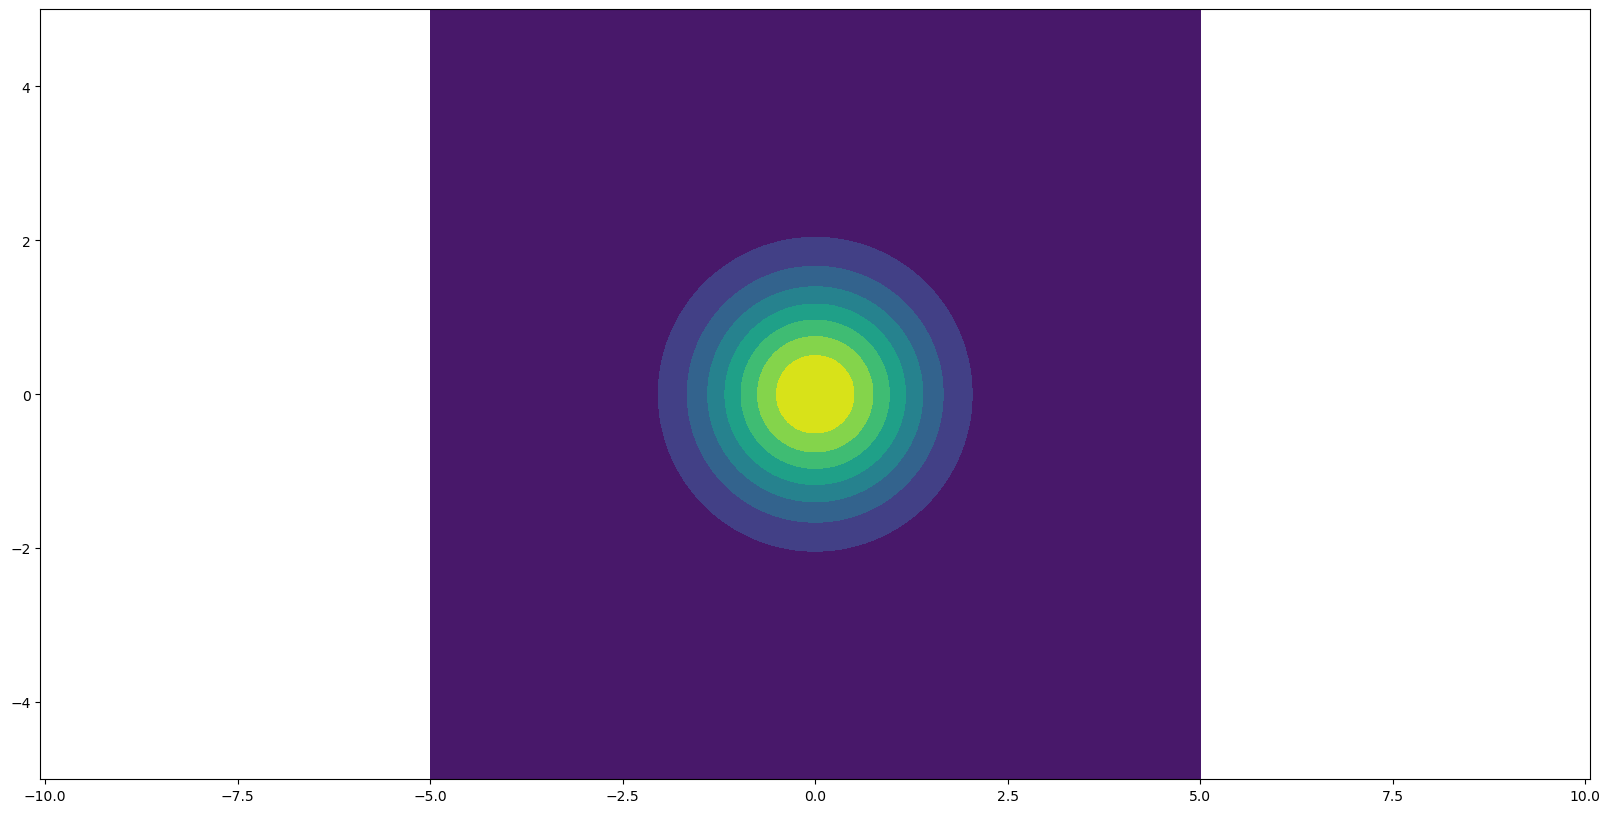

In [26]:
fig,ax = plt.subplots(figsize = (20,10))
plt.axis('equal')
ax.contourf(X,Y,Z,origincmap = cm.viridis);
# widok z gory

### Kowariancja
KowariancjƒÖ zmiennych losowych $X$ i $Y$ nazywamy liczbƒô $\text{Cov}(X, Y)$ okre≈õlonƒÖ wzorem
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}X)(Y-\mathbb{E}Y) ].
\end{equation*}

Kowariancja mo≈ºe byƒá traktowana jako pewna miara zgodno≈õci dw√≥ch zmiennych losowych, bƒôdƒÖc ≈õredniƒÖ warto≈õciƒÖ iloczynu odchyle≈Ñ obu zmiennych od ich warto≈õci oczekiwanych.

Bezpo≈õrednio z definicji wynika, ≈ºe
\begin{equation*}
    \text{Cov}(X, Y) = \mathbb{E}(XY) - (\mathbb{E}X)(\mathbb{E}Y).
\end{equation*}

Gdy zmienna losowa $(X, Y)$ jest typu dyskretnego, to
    \begin{equation*}
        \mathbb{E}(XY) = \sum_i\sum_k x_iy_kP(X=x_i, Y=y_k).
    \end{equation*}
Gdy zmienna losowa $(X, Y)$ jest typu ciƒÖg≈Çego, to
    \begin{equation*}
        \mathbb{E}(XY) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} xyf(x,y)dxdy.
    \end{equation*}

W≈Çasno≈õci:
    

*   Je≈ºeli $\text{Cov}(X, Y)=0$, to zmienne losowe $X$ i $Y$ nazywamy eskorelowanymi. Wynika stƒÖd, ≈ºe zmienne losowe niezale≈ºne sƒÖ jednocze≈õnie nieskorelowane, ale zmienne losowe nieskorelowane mogƒÖ byƒá zale≈ºne.
*   $\text{Var}(X\pm Y) = \text{Var}(X) + \text{Var}(Y) \pm 2\text{Cov}(X, Y)$.
*   $\text{Cov}(aX+b, cY+d) = ac\text{Cov}(X, Y)$.


#Wsp√≥≈Çczynnik korelacji
Wsp√≥≈Çczynnikiem korelacji zmiennych losowych $X$ i $Y$ nazywamy liczbƒô
\begin{equation*}
    \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)}\sqrt{\text{Var}(Y)}}
\end{equation*}
W≈Çasno≈õci:

*    $|\rho(X, Y)|\leq 1$.
*    Je≈ºeli zmienne losowe $X$ i $Y$ sƒÖ niezale≈ºne, to $\rho(X, Y)=0$.
*   Dla dowolnych liczb rzeczywistych $a, b, c, d$ zachodzi
    \begin{equation*}
        |\rho(aX+b, cY+d)|=|\rho(X, Y)|.
    \end{equation*}
*    Zmienne losowe $X$ i $Y$ sƒÖ zale≈ºne liniowo wtedy i tylko wtedy, gdy $|\rho(X, Y)|=1$

#Korelacja Pearsona
Chcemy przybli≈ºaƒá $\rho(X, Y)$ za pomocƒÖ pr√≥by. Empirycznym odpowiednikiem korelacji jest korelacja Pearsona dana wzorem:
\begin{equation*}
\hat{\rho}(X_1,...,X_n,Y_1,..,Y_n) = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}
\end{equation*}

#Macierz Kowariancji

Niech $(X_1, X_2, \ldots, X_n)$ bƒôdzie wektorem losowym (o sk≈Çadowych ca≈Çkowalnych z kwadratem), wtedy \textbf{macierz kowariancji} jest okre≈õlona nastƒôpujƒÖco:
\begin{equation*}
    \sum =
\begin{bmatrix}
\sigma^2_1 & \sigma_{12} & \ldots & \sigma_{1n}\\
\sigma_{21} & \sigma^2_2 & \ldots & \sigma_{2n}\\
\vdots & \ldots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \ldots & \sigma^2_n
\end{bmatrix}
\end{equation*}
gdzie:
*    $\sigma_i^2$ jest wariancjƒÖ zmiennej losowej $X_i$;
*    $\sigma_{ij}=\text{Cov}(X_i, X_j)$ jest kowariancjƒÖ miƒôdzy zmiennymi losowym $X_i$ oraz $X_j$.

#Wielowymiarowy rozk≈Çad normalny
Wektor losowy $(X_1,\ldots, X_n)$ ma rozk≈Çad $N$-wymiarowy rozk≈Çad normalny z macierzƒÖ kowariancji $\sum$ oraz wektorem ≈õrednich $\mu$, je≈ºeli jej gƒôsto≈õƒá $f$ wyra≈ºa siƒô wzorem
\begin{equation*}
    f(x_1, \ldots, x_n) = \frac{1}{\sqrt{(2\pi)^n|\sum|}} \exp\Bigg\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \Bigg\}.
\end{equation*}


## Zadanie 3 - Korelacja zmiennych losowych
Wygeneruj $3$-wymiarowy wektor losowy z rozk≈Çadu normalnego, tak aby 1 i 2 wsp√≥≈Çrzƒôdne by≈Çy ze sobƒÖ skorelowane, natomiast 1 i 3 oraz 2 i 3 sƒÖ zmiennymi parami niezale≈ºnymi.

1. Narysuj zale≈ºno≈õƒá pomiƒôdzy parami zmiennych (np. mo≈ºesz u≈ºyƒá funcji `pairplot`)
2. Oblicz wsp√≥≈Çczynnik korelacji Pearsona dla wygenerowanych par zmiennych i narysuj `heatmape`.
3. Powt√≥rz punkty 1 i 2 dla wektora $5$-wymiarowego z rozk≈Çadu normalnego, tak aby 1, 3 i 5 wsp√≥≈Çrzƒôdne by≈Çy ze sobƒÖ skorelowane a pozosta≈Çe niezale≈ºne.

\begin{equation*}
    \sum =
\begin{bmatrix}
\sigma^2_1 & \sigma_{12}  & \sigma_{13}\\
\sigma_{21} & \sigma^2_2  & \sigma_{23}\\
\sigma_{31} & \sigma_{32}  & \sigma^2_3
\end{bmatrix}
\end{equation*}

In [32]:
mu = [0,0,0]
s=[[4,2,0],[2,4,0],[0,0,4]]

mnormal = multivariate_normal(mean = mu,cov = s)

          0         1         2
0  1.000000  0.459308 -0.001266
1  0.459308  1.000000  0.021534
2 -0.001266  0.021534  1.000000


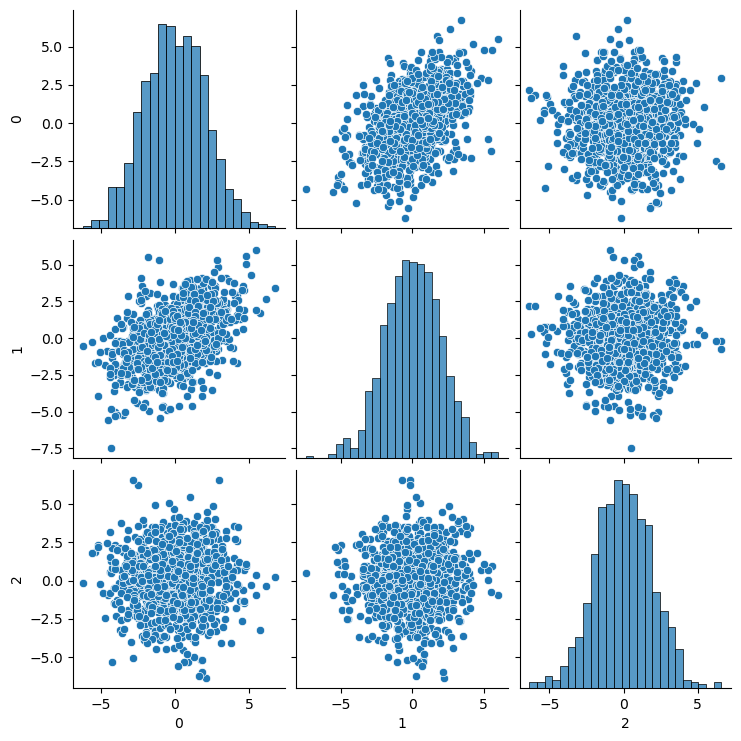

In [33]:
XYZ = mnormal.rvs(size=1000)
df = pd.DataFrame(XYZ)
cor = df.corr()
print(cor)
sns.pairplot(df)

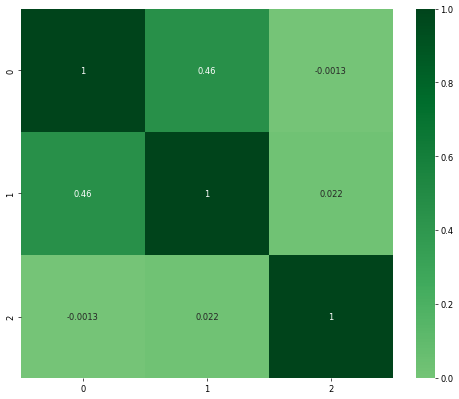

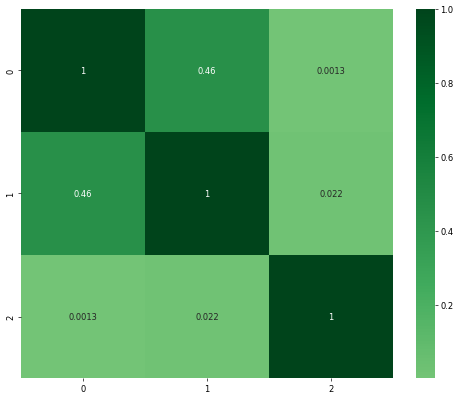

In [34]:
#heatmapa
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()
#mo≈ºna braƒá te≈º warto≈õci bezwzglƒôdne - w√≥wczas im ciemniejszy kolor
#tym bardziej od siebie zale≈ºne zmienne
plt.figure(figsize=(10,8),dpi = 60)
ax = sns.heatmap(np.abs(cor),xticklabels=cor.columns,yticklabels=cor.columns,cmap = 'Greens',center = 0,annot = True)
plt.show()

## Zadanie 4 - Centralne twierdzenie graniczne

1. Szacuje siƒô, ≈ºe w ≈õrednia warto≈õƒá ilorazu inteligencji wynosi 100 z odchyleniem standardowym 15. Jakie jest prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d 30 losowo wybranych os√≥b, ich ≈õredni iloraz inteligencji przekroczy 105?

2. Szacuje siƒô, ≈ºe 60% doros≈Çych Polak√≥w posiada w≈Çasny samoch√≥d. Jakie jest prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d 1000 os√≥b bƒôdzie od 500 do 700 posiadaczy w≈Çasnego auta?

3. Co dwudziesta m≈Çoda osoba w Polsce jest na diecie wega≈Ñskiej. Wyznacz prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d 100 m≈Çodych Polak√≥w, od 5 do 10 os√≥b bƒôdzie na diecie wega≈Ñskiej?

4. Szacuje siƒô, ≈ºe rozk≈Çad wieku kobiety w chwili urodzenia pierwszego dziecka jest normalny ze ≈õredniƒÖ 27 lat i odchyleniu standardowym 4 lata. Jakie jest prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d 100 losowo wybranych kobiet, ich ≈õrednia wieku, kiedy urodzi≈Çy pierwsze dziecko przekroczy 30 lat?

5. Przeprowadzone badania pokaza≈Çy, ≈ºe co trzeci doros≈Çy mƒô≈ºczyzna doje≈ºd≈ºa do pracy w≈Çasnym pojazdem. Jakie jest prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d 300 losowo wybranych mƒô≈ºczyzn co najmniej 80, ale nie wiƒôcej ni≈º 120, doje≈ºd≈ºa do pracy w≈Çasnym pojazdem?

6. Przyjmuje siƒô, ≈ºe 1\% populacji choruje na schizofreniƒô. Oblicz prawdopodobie≈Ñstwo, ≈ºe w≈õr√≥d losowo wybranych
1000 os√≥b bƒôdzie wiƒôcej ni≈º 12 cierpiƒÖcych na to zaburzenie.

1. Mamy rozk≈Çad (niekoniecznie normalny) o ≈õredniej $\mu = 100$ i odchyleniem standardowym $\sigma = 15$. Chcemy, ≈ºeby ≈õrednia by≈Ça wiƒôksza od $105$, zatem chcemy aby suma: $S_n>105*30 = 3150$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(S_n>3150) = 1-\mathbb{P}(S_n\leqslant 3150)\\
 = 1-\mathbb{P}\left(\frac{S_n-n\mu}{\sqrt{n}\sigma}\leqslant \frac{3150-n\mu}{\sqrt{n}\sigma}\right) \\
 = 1-\mathbb{P}\left(\frac{S_n-30*100}{\sqrt{30}*15}\leqslant \frac{3150-30*100}{\sqrt{30}*15}\right)\\
 = 1-\mathbb{P}\left(\frac{S_n-3000}{\sqrt{30}*15}\leqslant \frac{10}{\sqrt{30}}\right)\\
  \approx 1-ùöΩ\left(\frac{10}{\sqrt{30}}\right) \approx 0.03
\end{equation*}

2. Mamy rozk≈Çad Benoulliego o prawdopodobie≈Ñstwie $p = 0.6$. Chcemy, ≈ºeby suma os√≥b posiadajƒÖcych samochody by≈Ça od $500$ do $700$, zatem chcemy aby suma: $500\leqslant S_n\leqslant 700$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(500\leqslant S_n\leqslant 700) =...
\end{equation*}

3. Mamy rozk≈Çad Benoulliego o prawdopodobie≈Ñstwie $p = 0.05$. Chcemy, ≈ºeby suma os√≥b na diecie wega≈Ñskiej by≈Ça od $5$ do $10$, zatem chcemy aby suma: $5\leqslant S_n\leqslant 10$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(5\leqslant S_n\leqslant 10) =...
\end{equation*}

4. Mamy rozk≈Çad normalny o ≈õredniej $\mu = 27$ i odchyleniem standardowym $\sigma = 4$. Chcemy, ≈ºeby ≈õrednia by≈Ça wiƒôksza od $30$, zatem chcemy aby suma: $S_n>100*30 = 3000$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(S_n>3000) = ...
\end{equation*}

5. Mamy rozk≈Çad Benoulliego o prawdopodobie≈Ñstwie $p = \frac{1}{3}$. Chcemy, ≈ºeby suma os√≥b doje≈ºd≈ºajƒÖcych swoim pojazdem do pracy by≈Ça od $80$ do $120$, zatem chcemy aby suma: $80\leqslant S_n\leqslant 120$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(80\leqslant S_n\leqslant 120) =...
\end{equation*}

6. Mamy rozk≈Çad Benoulliego o prawdopodobie≈Ñstwie $p = 0.01$. Chcemy, obliczyƒá prawdopodobie≈Ñstwo zdarzenia, ≈ºe suma os√≥b chorujƒÖcych na schizofreniƒô jest wiƒôksza od $12$, zatem chcemy aby suma: $12< S_n$. Zatem korzystajƒÖc z CTG:
\begin{equation*}
\mathbb{P}(12< S_n) = ...
\end{equation*}